In [1]:
!pip install git+https://github.com/gbolmier/funk-svd 
!pip install hdbscan

  Cloning https://github.com/gbolmier/funk-svd to c:\users\hhhou\appdata\local\temp\pip-req-build-poas5g4n
  Resolved https://github.com/gbolmier/funk-svd to commit 69e9030e637dfb85c1123a7bc3c51e3076c89aa9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gbolmier/funk-svd 'C:\Users\HHhou\AppData\Local\Temp\pip-req-build-poas5g4n'
ERROR: Package 'funk-svd' requires a different Python: 3.9.7 not in '<=3.9.1,>=3.6.5'
You should consider upgrading via the 'S:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from funk_svd import SVD
from funk_svd.utils import _timer

In [3]:
df = pd.read_csv('../training_set_VU_DM.csv')
df2=df[['srch_id', 'prop_id', 'click_bool', 'booking_bool', 'date_time']]
df2.dtypes
df_test = df['gross_bookings_usd']
print(df_test.sum())
print(df_test.isnull().sum())
print(len(df2[df2['booking_bool'] == 0]))
print(len(df2.query('booking_bool == 0')))
df3 = df2.groupby('srch_id')[['booking_bool', 'click_bool']].apply(lambda x: x.astype(int).sum())
df3.describe()

53457748.08999998
4819957
4819957
4819957


,booking_bool,click_bool
count,199795.000000,199795.000000
mean,0.692660,1.110533
std,0.461393,0.563393
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,25.000000


Hotel Clustering

In [2]:
def analysis_cluster_labels(labels):
    count = []
    for i in range(max(labels)+1):
        count.append((labels == i).sum())
    print(f' len: {len(count)}, max: {max(count)}, min: {min(count)}, mean: {int(np.mean(count))}, median: {np.median(count)}')

In [3]:
df_hotel = pd.read_csv('data/hotel_data.csv')
# df_hotel['rating'] = df_hotel['booking_bool']*4 + df_hotel['click_bool']
# df_hotel[['log_rating', 'log_promotion_flag']] = np.log(df_hotel[['rating', 'promotion_flag']]+1)
# df_hotel[['log_srch_count']] = np.log(df_hotel[['srch_count']])
# df_hotel = df_hotel.drop(columns=['price_usd', 'booking_bool', 'click_bool', 'promotion_flag', 'srch_count', 'rating'])
df_hotel.describe()

,Unnamed: 0,prop_id,srch_count,promotion_flag,random_bool,agg_price_usd_mean,agg_price_usd_std,agg_price_usd_median,agg_prop_location_score1_mean,agg_prop_location_score1_std,...,booking_bool,click_bool,position_mean,position_std,position_median,srch_query_affinity_score,srch_query_affinity_score_median,click_prob,book_prob1,book_prob2
count,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.0,...,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,136885.000000,1.368850e+05,136885.000000,1.368850e+05
mean,68442.000000,70415.662593,72.441144,15.628601,21.472389,140.392954,90.499308,125.264955,2.373102,0.0,...,1.010783,1.620594,16.369968,5.959344,16.367353,-26.299584,-25.423267,1.040759e-01,0.821928,8.407671e-02
std,39515.440136,40661.656010,159.744366,84.818313,47.340261,331.946460,659.613211,268.018163,1.625079,0.0,...,3.099164,4.577142,7.263385,4.160617,8.169634,9.943827,10.200641,2.469702e-01,0.331303,2.399926e-01
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.070000,0.000000,0.070000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,-168.572400,-168.572400,1.926782e-07,0.000008,1.081081e-07
25%,34221.000000,35194.000000,6.000000,0.000000,2.000000,77.553333,8.911833,73.000000,1.100000,0.0,...,0.000000,0.000000,11.020000,2.121320,10.000000,-31.074188,-30.356020,1.999960e-05,0.750006,1.111099e-05
50%,68442.000000,70411.000000,21.000000,0.000000,7.000000,108.681683,20.958400,103.000000,2.200000,0.0,...,0.000000,0.000000,16.780488,6.493587,16.000000,-24.981280,-24.033140,9.999000e-05,1.000000,4.999750e-05
75%,102663.000000,105628.000000,74.000000,2.000000,22.000000,153.380000,44.358527,143.410000,3.500000,0.0,...,1.000000,1.000000,21.598333,9.242289,22.100000,-20.341770,-19.098500,6.976961e-02,1.000000,3.448609e-02
max,136884.000000,140821.000000,4733.000000,4541.000000,1661.000000,80000.000000,54430.074812,80000.000000,6.980000,0.0,...,159.000000,245.000000,38.000000,26.162951,38.000000,-4.013300,-3.853600,1.000000e+00,1.000000,1.000000e+00


In [4]:
df_hotel.columns

Index(['Unnamed: 0', 'prop_id', 'srch_count', 'promotion_flag', 'random_bool',
       'agg_price_usd_mean', 'agg_price_usd_std', 'agg_price_usd_median',
       'agg_prop_location_score1_mean', 'agg_prop_location_score1_std',
       'agg_prop_location_score1_median', 'agg_prop_location_score2_mean',
       'agg_prop_location_score2_std', 'agg_prop_location_score2_median',
       'agg_prop_starrating_mean', 'agg_prop_starrating_std',
       'agg_prop_starrating_median', 'agg_prop_review_score_mean',
       'agg_prop_review_score_std', 'agg_prop_review_score_median',
       'booking_bool', 'click_bool', 'position_mean', 'position_std',
       'position_median', 'srch_query_affinity_score',
       'srch_query_affinity_score_median', 'click_prob', 'book_prob1',
       'book_prob2'],
      dtype='object')

In [5]:
# drop useless feature columes
df_hotel_useful = df_hotel.drop(columns=['Unnamed: 0']).sort_values(by=['prop_id'])
hotel_array = df_hotel_useful.to_numpy()
prop_id_array = hotel_array[:,0]
prop_feature_array = np.nan_to_num(hotel_array[:,1:])
scaler = StandardScaler()
scaler.fit(prop_feature_array)
prop_feature_scaled = scaler.transform(prop_feature_array)
print(np.argwhere(np.isnan(prop_feature_scaled)))

[]


In [6]:
# conda install -c conda-forge hdbscan
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(prop_feature_scaled)

analysis_cluster_labels(clusterer.labels_)
print(f'noisy data count {(clusterer.labels_ == -1).sum()}')

 len: 2, max: 136535, min: 11, mean: 68273, median: 68273.0
noisy data count 339


In [7]:
cluster_array_1 = np.hstack((prop_id_array.reshape(-1,1), clusterer.labels_.reshape(-1,1)))
df_cluster_1 = pd.DataFrame(cluster_array_1, columns = ['prop_id', 'cluster_1']).astype({"prop_id":"int64","cluster_1":"int64"})
df_hotel_useful = pd.merge(df_hotel_useful, df_cluster_1)
df_hotel_useful.head()

,prop_id,srch_count,promotion_flag,random_bool,agg_price_usd_mean,agg_price_usd_std,agg_price_usd_median,agg_prop_location_score1_mean,agg_prop_location_score1_std,agg_prop_location_score1_median,...,click_bool,position_mean,position_std,position_median,srch_query_affinity_score,srch_query_affinity_score_median,click_prob,book_prob1,book_prob2,cluster_1
0,1,123,0,27,94.960650,10.161463,99.000,3.04,0.0,3.04,...,1.0,30.891304,5.900012,33.0,-46.171467,-38.32070,0.016395,0.00010,0.000002,1
1,2,29,0,3,97.149655,4.394746,97.000,0.69,0.0,0.69,...,1.0,16.400000,3.777124,19.0,-22.589767,-24.09040,0.090917,1.00000,0.090917,1
2,3,172,1,40,117.853895,96.052149,100.000,0.69,0.0,0.69,...,2.0,20.238806,11.379260,21.0,-29.565475,-24.58075,0.024391,1.00000,0.024391,1
3,4,42,12,20,485.960952,177.329762,434.725,4.88,0.0,4.88,...,1.0,16.727273,8.295672,14.0,-29.219567,-27.79299,0.045459,1.00000,0.045459,1
4,5,52,3,30,605.083654,225.930093,589.550,6.02,0.0,6.02,...,2.0,24.384615,8.036774,25.0,-42.162970,-41.52396,0.066670,0.00005,0.000003,1


In [8]:
df_hotel_clustered = df_hotel_useful.query('cluster_1 != -1').drop(columns=['cluster_1'])
hotel_array_2 = df_hotel_clustered.to_numpy()
prop_id_array_2 = hotel_array_2[:,0]
prop_feature_array_2 = np.nan_to_num(hotel_array_2[:,1:])
scaler2 = StandardScaler()
scaler2.fit(prop_feature_array_2)
prop_feature_scaled_2 = scaler2.transform(prop_feature_array_2)
print(prop_feature_scaled_2.shape)

(136546, 28)


Cluster memberships:
[399 188 309 ... 475 422 314]
 len: 500, max: 800, min: 4, mean: 273, median: 260.5


s:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
s:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE feature 1')

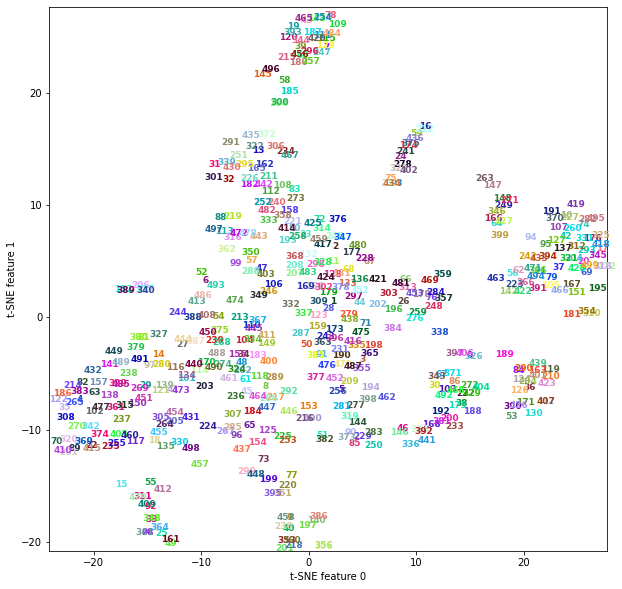

In [9]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import random

kmeans = KMeans(n_clusters=500)
kmeans.fit(prop_feature_scaled_2)

print(f"Cluster memberships:\n{kmeans.labels_}")

analysis_cluster_labels(kmeans.labels_)

# plot kmeans center
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,10))

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(kmeans.cluster_centers_)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str((range(len(kmeans.cluster_centers_)))[i]),
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]),
        fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

s:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
s:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE feature 1')

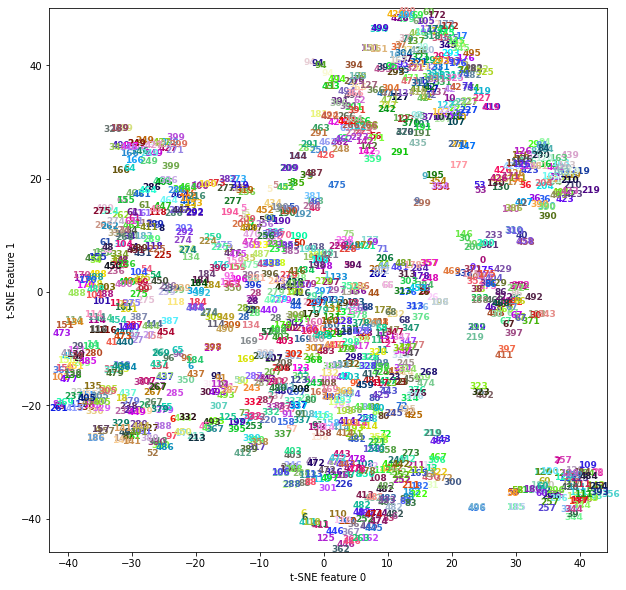

In [10]:
#sample
def sample(feature, label):
    index = list(range(len(feature)))
    sample_idx = np.random.choice(index, round(len(index)/100), replace=False)
    sample_feature = feature[sample_idx]
    sample_label = label[sample_idx]
    return sample_feature, sample_label

sample_feature, sample_label = sample(prop_feature_scaled_2, kmeans.labels_)
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(sample_feature)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(sample_feature)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(sample_label[i]),
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]),
        fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [19]:
cluster_array_2 = np.hstack((prop_id_array_2.reshape(-1,1), kmeans.labels_.reshape(-1,1)))
df_cluster_2 = pd.DataFrame(cluster_array_2, columns = ['prop_id', 'cluster_2']).astype({"prop_id":"int64","cluster_2":"int64"})
# df_hotel_useful_2 = pd.merge(df_hotel_useful, df_cluster_2)

df = pd.read_csv('../training_set_VU_DM.csv')
df = pd.merge(df[['srch_id', 'prop_id', 'click_bool', 'booking_bool']], df_cluster_2[['prop_id', 'cluster_2']])

In [20]:
@_timer(text='')
def compute_val_test_mask(data, n_rate=4):
    val_test_mask = []
    users = data['u_id'].unique()
    
    for u_id in users:
        u_subset = data[data['u_id'] == u_id].copy()
        val_test_mask += u_subset.iloc[-n_rate:].index.tolist()
        
    return val_test_mask

def my_scaler(min_scale_num,max_scale_num,var):
    return (max_scale_num - min_scale_num) * ( (var - min(var)) / (max(var) - min(var)) ) + min_scale_num

In [21]:
pd.options.mode.chained_assignment = None
df2 = df.groupby(['srch_id', 'cluster_2'])[['click_bool', 'booking_bool']].agg('sum').reset_index().astype({"click_bool":"float64"})
df2['log_rating'] = 4*df2['booking_bool']+df2['click_bool']
df2['log_rating'] = np.log(df2[['log_rating']]+1)
df2['rating'] = my_scaler(0,5,df2['click_bool'].astype(float))
df_all = df2.copy()
df_all['rating'][df_all.rating==0]=-1
df_all['u_id'] = df_all['srch_id']
df_all['i_id'] = df_all['cluster_2']
df_all = df_all.iloc[:,-3:]

val_test_mask = compute_val_test_mask(df_all)
seed = 3
np.random.seed(seed)
train = df_all.drop(val_test_mask)
val = df_all.loc[val_test_mask].sample(frac=0.5, random_state=seed)
test = df_all.loc[val_test_mask].drop(val.index.tolist())

10 min and 37 sec


In [22]:
svd = SVD(lr=0.001, reg=0.005, n_epochs=20, n_factors=1000,
          early_stopping=True, shuffle=False, min_rating=-1, max_rating=5)

svd.fit(X=train, X_val=val)

pred = svd.predict(test)

rmse = np.sqrt(mean_squared_error(test['rating'], pred))
mae = mean_absolute_error(test['rating'], pred)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAE:  {mae:.2f}')
print()

Preprocessing data...

Preprocessing data...

Epoch 1/20  | val_loss: 0.26 - val_rmse: 0.51 - val_mae: 0.33 - took 8.0 sec
Epoch 2/20  | val_loss: 0.25 - val_rmse: 0.50 - val_mae: 0.32 - took 6.7 sec
Epoch 3/20  | val_loss: 0.25 - val_rmse: 0.50 - val_mae: 0.31 - took 6.7 sec
Epoch 4/20  | val_loss: 0.24 - val_rmse: 0.49 - val_mae: 0.31 - took 6.7 sec
Epoch 5/20  | val_loss: 0.24 - val_rmse: 0.49 - val_mae: 0.30 - took 6.7 sec
Epoch 6/20  | val_loss: 0.24 - val_rmse: 0.49 - val_mae: 0.30 - took 6.7 sec
Epoch 7/20  | val_loss: 0.24 - val_rmse: 0.49 - val_mae: 0.30 - took 6.7 sec
Epoch 8/20  | val_loss: 0.24 - val_rmse: 0.49 - val_mae: 0.29 - took 6.7 sec
Epoch 9/20  | val_loss: 0.23 - val_rmse: 0.48 - val_mae: 0.29 - took 6.7 sec
Epoch 10/20 | val_loss: 0.23 - val_rmse: 0.48 - val_mae: 0.29 - took 6.7 sec
Epoch 11/20 | val_loss: 0.23 - val_rmse: 0.48 - val_mae: 0.29 - took 6.9 sec

Training took 1 min and 27 sec
Test RMSE: 0.45
Test MAE:  0.24



In [294]:
mask = np.argwhere(np.array(pred) > 0)
# np.array(pred)[mask]

print(len(pred), mask.shape)


398255 (252, 1)


In [23]:
import pickle
# Save model
pickle.dump(kmeans, open("kmeans.pkl", "wb"))
pickle.dump(svd, open("svd.pkl", "wb"))

In [302]:
svd_2 = pickle.load(open("svd.pkl", "rb"))
pred2 = svd_2.predict(test)

rmse = np.sqrt(mean_squared_error(test['rating'], pred2))
mae = mean_absolute_error(test['rating'], pred2)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAE:  {mae:.2f}')
print()

Test RMSE: 0.44
Test MAE:  0.23



In [36]:
# hierarchy = clusterer.cluster_hierarchy_
# alt_labels = hierarchy.get_clusters(0.100, 5)
# hierarchy.plot()

489 22853 5


Search Clustering

In [25]:
df_srch = pd.read_csv('data/srch_info.csv')
df_srch[['log_srch_length_of_stay', 'log_click_bool', 'log_srch_room_count', 'log_srch_adults_count']] = np.log(df_srch[['srch_length_of_stay', 'click_bool', 'srch_room_count', 'srch_adults_count']])
df_srch[['log_srch_children_count']] = np.log(df_srch[['srch_children_count']]+1)
df_srch = df_srch.drop(columns=['srch_length_of_stay', 'click_bool', 'srch_room_count', 'srch_adults_count', 'srch_children_count']).iloc[:,1:]
df_srch.describe()

,srch_id,booking_bool,orig_destination_distance,srch_booking_window,srch_saturday_night_bool,log_srch_length_of_stay,log_click_bool,log_srch_room_count,log_srch_adults_count,log_srch_children_count
count,199795.000000,199795.000000,199795.000000,199795.000000,199795.000000,199795.000000,199795.000000,199795.000000,199795.000000,199795.000000
mean,166485.437889,0.692660,6.393348,2.773785,1.591632,0.629442,0.059172,0.079418,0.602856,0.219479
std,96094.934084,0.461393,1.527006,1.452726,1.611816,0.652879,0.242489,0.244865,0.397984,0.403933
min,1.000000,0.000000,0.159849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83131.500000,0.000000,5.437617,1.609438,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
50%,166594.000000,1.000000,7.171837,2.890372,1.791759,0.693147,0.000000,0.000000,0.693147,0.000000
75%,249870.500000,1.000000,7.171837,3.912023,3.401197,1.098612,0.000000,0.000000,0.693147,0.000000
max,332785.000000,1.000000,9.362878,6.200509,3.663562,4.043051,3.218876,2.079442,2.197225,2.302585


In [190]:
srch_array = df_srch.drop(columns=['booking_bool', 'log_click_bool']).to_numpy()
srch_id_array = srch_array[:,0]
srch_feature_array = np.nan_to_num(srch_array[:,1:])

scaler2 = StandardScaler()
scaler2.fit(srch_feature_array)
srch_feature_scaled = scaler2.transform(srch_feature_array)

clusterer_2 = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer_2.fit(srch_feature_scaled)

print(f"Cluster memberships:\n{clusterer_2.labels_}")

analysis_cluster_labels(clusterer_2.labels_)
print(f'noisy data count {(clusterer_2.labels_ == -1).sum()}')

Cluster memberships:
[  24 1279  856 ...   -1  921   -1]
 len: 2445, max: 1819, min: 10, mean: 44, median: 20.0
noisy data count 92030
